# SCGNN Train - Kaza - No PCA

In [1]:
import pandas as pd
import sys
import torch
from pathlib import Path
sys.path.append('../..')
from src import config
from src.utils.dataset import TrafficDataset
from src.utils.model import TrafficPredictor
from torch.utils.data import DataLoader, random_split

In [2]:
DATASET_PATH = config.DATA_KAZA
jsonl_file = DATASET_PATH / "data.jsonl"
if jsonl_file.exists():
    df = pd.read_json(jsonl_file, lines=True)
    if "traffic_sequence" in df.columns:
        df = pd.DataFrame(df["traffic_sequence"].tolist())
else:
    df = pd.read_parquet(DATASET_PATH / "data.parquet")
df = df.fillna(0)
X_STEP, Y_STEP = 2, 1
data_array = df.values

258


Epoch 1/10  Train Loss: 25597.4482  Val Loss: 22774.5596  Val MSE: 22780.3926  Val R2: 0.0400
Epoch 2/10  Train Loss: 19013.6397  Val Loss: 15139.4764  Val MSE: 15143.5361  Val R2: 0.3618
Epoch 3/10  Train Loss: 13246.1934  Val Loss: 12452.1172  Val MSE: 12450.7998  Val R2: 0.4753
Epoch 4/10  Train Loss: 12487.1841  Val Loss: 12461.6037  Val MSE: 12459.9219  Val R2: 0.4749
Epoch 5/10  Train Loss: 12445.8384  Val Loss: 12450.8283  Val MSE: 12449.8574  Val R2: 0.4754
Epoch 6/10  Train Loss: 12438.0606  Val Loss: 12445.8045  Val MSE: 12444.6504  Val R2: 0.4756
Epoch 7/10  Train Loss: 12441.3443  Val Loss: 12443.7067  Val MSE: 12442.5586  Val R2: 0.4757
Epoch 8/10  Train Loss: 12435.8929  Val Loss: 12441.6364  Val MSE: 12440.5059  Val R2: 0.4757
Epoch 9/10  Train Loss: 12436.3035  Val Loss: 12439.3177  Val MSE: 12438.1768  Val R2: 0.4758
  >> Model saved to /home/orhankocak_0233/MLProject_570/models/scgnn_kaza_nopca.pt (val_loss improved)
Epoch 10/10  Train Loss: 12432.4307  Val Loss: 1243

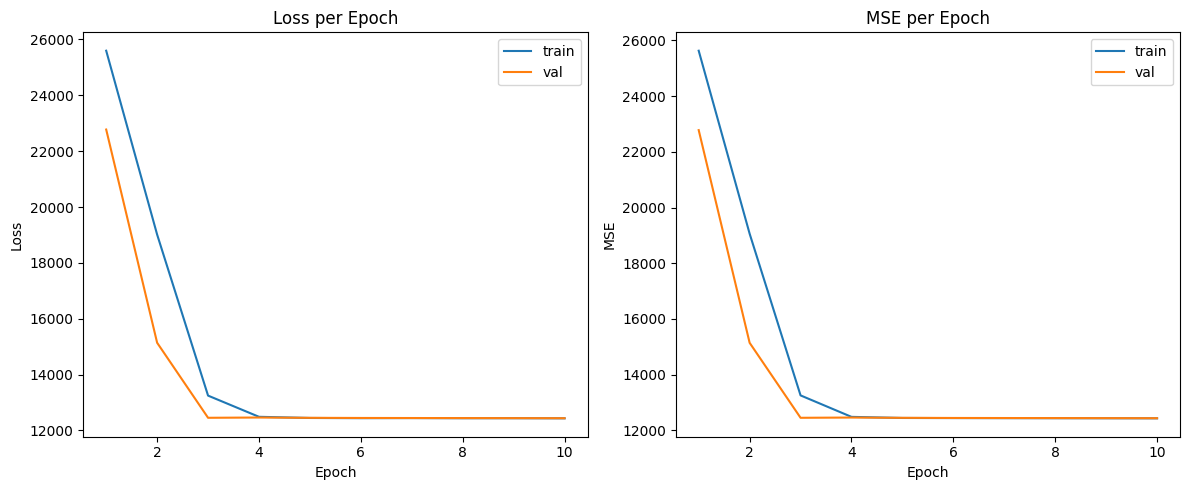

== Final Metrics ==
mse: 12435.8232421875
mae: 45.409793853759766
r2: 0.47594255208969116


In [4]:
# PCA kullanılmıyor
dataset = TrafficDataset(data_array, X_STEP, Y_STEP)
train_len = int(len(dataset) * 0.8)
val_len = len(dataset) - train_len
train_ds, val_ds = random_split(dataset, [train_len, val_len])
train_loader = DataLoader(train_ds, batch_size=10000, shuffle=True, num_workers=8)
val_loader = DataLoader(val_ds, batch_size=10000, num_workers=8)
sensors = dataset.sensors
print(sensors)
edges = []
for i in range(sensors - 1):
    edges.append([i, i + 1])
    edges.append([i + 1, i])
edge_index = torch.tensor(edges, dtype=torch.long).t()
predictor = TrafficPredictor('scgnn', sensors, X_STEP, Y_STEP, edge_index=edge_index, pca_model=dataset.pca if False else None)
predictor.train(train_loader, val_loader, epochs=10, save_path=config.PROJECT_ROOT.joinpath('models/scgnn_kaza_nopca.pt'), save_optimizer=True)
predictor.show()